In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('restaurant-1-orders.csv')

In [3]:
df.head()

Order Number        Order Date            Item Name  Quantity  \
0         16118  03/08/2019 20:25        Plain Papadum         2   
1         16118  03/08/2019 20:25     King Prawn Balti         1   
2         16118  03/08/2019 20:25          Garlic Naan         1   
3         16118  03/08/2019 20:25        Mushroom Rice         1   
4         16118  03/08/2019 20:25  Paneer Tikka Masala         1   

   Product Price  Total products  
0           0.80               6  
1          12.95               6  
2           2.95               6  
3           3.95               6  
4           8.95               6

the data has multiple rows for a single order. "order date" column should be separated and sorted. Can also make a recommendation (accompanying items) for complimentory items in a group order.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Number    74818 non-null  int64  
 1   Order Date      74818 non-null  object 
 2   Item Name       74818 non-null  object 
 3   Quantity        74818 non-null  int64  
 4   Product Price   74818 non-null  float64
 5   Total products  74818 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 3.4+ MB


In [5]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format='%d/%m/%Y %H:%M')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Number    74818 non-null  int64         
 1   Order Date      74818 non-null  datetime64[ns]
 2   Item Name       74818 non-null  object        
 3   Quantity        74818 non-null  int64         
 4   Product Price   74818 non-null  float64       
 5   Total products  74818 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 3.4+ MB


In [7]:
df['Item Name'].unique().size

248

Task 1: To predict what dishes will be ordered in the last week of every month and in what quantity? 
Task 2: In a single order, which items are likely to be grouped?
Task 3: Can we make seasonal cluster of items?
Task 4: Collaborative recommendation
Task 5: How does price play a role?

In [8]:
df.sort_values(by='Order Date', inplace=True)

In [9]:
df.describe()

Order Number                     Order Date      Quantity  \
count  74818.000000                          74818  74818.000000   
mean    9115.638162  2018-03-02 17:05:07.154962688      1.243564   
min      630.000000            2015-09-01 14:42:00      1.000000   
25%     5590.000000            2017-06-02 17:43:00      1.000000   
50%     9103.000000            2018-04-06 19:53:00      1.000000   
75%    12630.000000            2018-12-23 18:36:00      1.000000   
max    16118.000000            2019-08-03 20:25:00     51.000000   
std     4052.210452                            NaN      0.798207   

       Product Price  Total products  
count   74818.000000    74818.000000  
mean        5.286492        6.931434  
min         0.500000        1.000000  
25%         2.950000        5.000000  
50%         3.950000        6.000000  
75%         8.950000        8.000000  
max        17.950000       60.000000  
std         3.338221        3.954832

In [10]:
dfd = pd.DataFrame()

In [11]:
dfd = df.drop_duplicates(subset=['Item Name'])

In [12]:
dfd.drop(['Order Number', 'Order Date', 'Quantity', 'Total products'], axis=1, inplace=True)

/var/folders/sz/4dnyt_zd7_v7g39gxc4lz3000000gn/T/ipykernel_80406/209204372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd.drop(['Order Number', 'Order Date', 'Quantity', 'Total products'], axis=1, inplace=True)


In [13]:
dfd.reset_index(drop=True, inplace=True)

In [14]:
dfd

Item Name  Product Price
0                 Onion Bhaji           3.95
1               Chicken Tikka           7.95
2      Tandoori Chicken (1/4)           4.95
3            Vegetable Samosa           4.95
4               Tandoori Fish           5.95
..                        ...            ...
243              Methi - Lamb           8.95
244  Mushroom - Chicken Tikka           8.95
245           Methi - Chicken           8.95
246          Bottle Diet Coke           2.95
247           COBRA ( LARGE )           5.95

[248 rows x 2 columns]

In [15]:
df.drop(['Order Number'], inplace=True, axis=1)

In [16]:
df.head(26)

Order Date               Item Name  Quantity  Product Price  \
39152 2015-09-01 14:42:00             Onion Bhaji         1           3.95   
39151 2015-09-08 17:12:00             Onion Bhaji         1           3.95   
39150 2015-09-08 17:31:00             Onion Bhaji         1           3.95   
39149 2015-09-08 17:56:00             Onion Bhaji         1           3.95   
39148 2015-09-09 09:31:00             Onion Bhaji         1           3.95   
39147 2015-09-09 11:28:00             Onion Bhaji         1           3.95   
39146 2015-09-09 11:35:00             Onion Bhaji         1           3.95   
39145 2015-09-09 12:48:00             Onion Bhaji         1           3.95   
39144 2015-09-09 14:41:00             Onion Bhaji         1           3.95   
39143 2015-09-09 15:52:00             Onion Bhaji         1           3.95   
54026 2015-09-29 15:20:00           Chicken Tikka         1           7.95   
42118 2015-09-29 15:20:00  Tandoori Chicken (1/4)         1           4.95   
39142 2015-09-29 15:20:00           Chicken Tikka         3           3.95   
42117 2015-09-29 15:36:00        Vegetable Samosa         2           4.95   
50996 2015-09-29 15:36:00           Tandoori Fish         1           5.95   
42116 2015-09-29 16:16:00        Vegetable Samosa         1           4.95   
50995 2015-09-30 10:36:00           Tandoori Fish         1           5.95   
42115 2015-09-30 10:36:00  Tandoori Chicken (1/4)         1           4.95   
42114 2015-09-30 10:36:00        Vegetable Samosa         1           4.95   
39141 2015-09-30 15:38:00             Onion Bhaji         1           3.95   
50994 2015-09-30 15:38:00            Royal Paneer         1           5.95   
42113 2015-09-30 15:38:00             Prawn Puree         1           4.95   
42112 2015-09-30 15:38:00  Tandoori Chicken (1/4)         1           4.95   
42111 2015-09-30 15:38:00        Vegetable Samosa         4           4.95   
50993 2015-09-30 15:38:00           Tandoori Fish         4           5.95   
42110 2015-09-30 15:50:00        Vegetable Samosa         1           4.95   

       Total products  
39152               3  
39151               3  
39150               1  
39149               4  
39148               3  
39147               4  
39146               3  
39145               4  
39144               3  
39143               4  
54026               3  
42118               3  
39142               3  
42117               2  
50996               2  
42116               1  
50995               3  
42115               3  
42114               3  
39141               6  
50994               6  
42113               6  
42112               6  
42111               6  
50993               6  
42110               1

In [17]:
df.drop(['Product Price'], axis=1, inplace=True)    

groupby orderdate, index=false, comma separated item name, quantity to array, array sum to total products (corrected)

In [18]:
df_grouped = df.groupby('Order Date', as_index=False).agg({'Item Name': lambda x: ', '.join(x), 'Quantity': list})
# df_grouped.Quantity = list(df_grouped.Quantity)
df_grouped


Order Date                                          Item Name  \
0     2015-09-01 14:42:00                                        Onion Bhaji   
1     2015-09-08 17:12:00                                        Onion Bhaji   
2     2015-09-08 17:31:00                                        Onion Bhaji   
3     2015-09-08 17:56:00                                        Onion Bhaji   
4     2015-09-09 09:31:00                                        Onion Bhaji   
...                   ...                                                ...   
13076 2019-08-03 19:44:00                  Special Fried Rice, Chicken Balti   
13077 2019-08-03 20:01:00  Pilau Rice, Peshwari Naan, Korma - Prawn, Red ...   
13078 2019-08-03 20:09:00  Keema Naan, Lamb Biryani, Chicken Chilli Garli...   
13079 2019-08-03 20:17:00  Plain Naan, Mushroom Rice, Tandoori Chicken (1...   
13080 2019-08-03 20:25:00  Mango Chutney, Paneer Tikka Masala, Mushroom R...   

                    Quantity  
0                        [1]  
1                        [1]  
2                        [1]  
3                        [1]  
4                        [1]  
...                      ...  
13076                 [2, 1]  
13077  [1, 1, 1, 1, 1, 1, 1]  
13078        [1, 1, 1, 1, 1]  
13079  [1, 1, 1, 1, 1, 1, 1]  
13080     [1, 1, 1, 1, 1, 2]  

[13081 rows x 3 columns]

In [19]:
# df_grouped.Quantity = df_grouped.Quantity.apply(lambda x: list(x))
# df_grouped

In [20]:
# df_grouped.Quantity = df_grouped.Quantity.apply(lambda x: [int(i) for i in x])

In [21]:
df_grouped['Total products'] = df_grouped.Quantity.apply(lambda x: sum(x))

In [22]:
df_grouped

Order Date                                          Item Name  \
0     2015-09-01 14:42:00                                        Onion Bhaji   
1     2015-09-08 17:12:00                                        Onion Bhaji   
2     2015-09-08 17:31:00                                        Onion Bhaji   
3     2015-09-08 17:56:00                                        Onion Bhaji   
4     2015-09-09 09:31:00                                        Onion Bhaji   
...                   ...                                                ...   
13076 2019-08-03 19:44:00                  Special Fried Rice, Chicken Balti   
13077 2019-08-03 20:01:00  Pilau Rice, Peshwari Naan, Korma - Prawn, Red ...   
13078 2019-08-03 20:09:00  Keema Naan, Lamb Biryani, Chicken Chilli Garli...   
13079 2019-08-03 20:17:00  Plain Naan, Mushroom Rice, Tandoori Chicken (1...   
13080 2019-08-03 20:25:00  Mango Chutney, Paneer Tikka Masala, Mushroom R...   

                    Quantity  Total products  
0                        [1]               1  
1                        [1]               1  
2                        [1]               1  
3                        [1]               1  
4                        [1]               1  
...                      ...             ...  
13076                 [2, 1]               3  
13077  [1, 1, 1, 1, 1, 1, 1]               7  
13078        [1, 1, 1, 1, 1]               5  
13079  [1, 1, 1, 1, 1, 1, 1]               7  
13080     [1, 1, 1, 1, 1, 2]               7  

[13081 rows x 4 columns]

In [23]:
df_grouped.loc[0,'Item Name'].split(", ")[0]

'Onion Bhaji'

In [24]:
dfd.loc[dfd['Item Name'] == df_grouped["Item Name"][0].split(", ")[0], 'Product Price'] 

0    3.95
Name: Product Price, dtype: float64

In [25]:
df_grouped['PriceArray'] = ''
df_grouped

Order Date                                          Item Name  \
0     2015-09-01 14:42:00                                        Onion Bhaji   
1     2015-09-08 17:12:00                                        Onion Bhaji   
2     2015-09-08 17:31:00                                        Onion Bhaji   
3     2015-09-08 17:56:00                                        Onion Bhaji   
4     2015-09-09 09:31:00                                        Onion Bhaji   
...                   ...                                                ...   
13076 2019-08-03 19:44:00                  Special Fried Rice, Chicken Balti   
13077 2019-08-03 20:01:00  Pilau Rice, Peshwari Naan, Korma - Prawn, Red ...   
13078 2019-08-03 20:09:00  Keema Naan, Lamb Biryani, Chicken Chilli Garli...   
13079 2019-08-03 20:17:00  Plain Naan, Mushroom Rice, Tandoori Chicken (1...   
13080 2019-08-03 20:25:00  Mango Chutney, Paneer Tikka Masala, Mushroom R...   

                    Quantity  Total products PriceArray  
0                        [1]               1             
1                        [1]               1             
2                        [1]               1             
3                        [1]               1             
4                        [1]               1             
...                      ...             ...        ...  
13076                 [2, 1]               3             
13077  [1, 1, 1, 1, 1, 1, 1]               7             
13078        [1, 1, 1, 1, 1]               5             
13079  [1, 1, 1, 1, 1, 1, 1]               7             
13080     [1, 1, 1, 1, 1, 2]               7             

[13081 rows x 5 columns]

In [26]:
df_grouped['PriceArray'] = df_grouped['Item Name'].apply(lambda x: [dfd.loc[dfd['Item Name'] == i, 'Product Price'].values[0] for i in x.split(", ")])
df_grouped

Order Date                                          Item Name  \
0     2015-09-01 14:42:00                                        Onion Bhaji   
1     2015-09-08 17:12:00                                        Onion Bhaji   
2     2015-09-08 17:31:00                                        Onion Bhaji   
3     2015-09-08 17:56:00                                        Onion Bhaji   
4     2015-09-09 09:31:00                                        Onion Bhaji   
...                   ...                                                ...   
13076 2019-08-03 19:44:00                  Special Fried Rice, Chicken Balti   
13077 2019-08-03 20:01:00  Pilau Rice, Peshwari Naan, Korma - Prawn, Red ...   
13078 2019-08-03 20:09:00  Keema Naan, Lamb Biryani, Chicken Chilli Garli...   
13079 2019-08-03 20:17:00  Plain Naan, Mushroom Rice, Tandoori Chicken (1...   
13080 2019-08-03 20:25:00  Mango Chutney, Paneer Tikka Masala, Mushroom R...   

                    Quantity  Total products  \
0                        [1]               1   
1                        [1]               1   
2                        [1]               1   
3                        [1]               1   
4                        [1]               1   
...                      ...             ...   
13076                 [2, 1]               3   
13077  [1, 1, 1, 1, 1, 1, 1]               7   
13078        [1, 1, 1, 1, 1]               5   
13079  [1, 1, 1, 1, 1, 1, 1]               7   
13080     [1, 1, 1, 1, 1, 2]               7   

                                      PriceArray  
0                                         [3.95]  
1                                         [3.95]  
2                                         [3.95]  
3                                         [3.95]  
4                                         [3.95]  
...                                          ...  
13076                               [3.95, 9.95]  
13077    [2.95, 2.95, 9.95, 0.5, 0.5, 0.8, 5.95]  
13078             [2.95, 9.95, 9.95, 5.95, 4.95]  
13079  [2.6, 3.95, 4.95, 5.95, 1.95, 4.95, 7.95]  
13080        [0.5, 8.95, 3.95, 2.95, 12.95, 0.8]  

[13081 rows x 5 columns]

In [27]:
len(df_grouped.Quantity[0])

1

In [28]:
df_grouped['Revenue'] = [np.dot(quantity, price) if len(quantity) == len(price) else 0 for quantity, price in zip(df_grouped['Quantity'], df_grouped['PriceArray'])]
df_grouped

Order Date                                          Item Name  \
0     2015-09-01 14:42:00                                        Onion Bhaji   
1     2015-09-08 17:12:00                                        Onion Bhaji   
2     2015-09-08 17:31:00                                        Onion Bhaji   
3     2015-09-08 17:56:00                                        Onion Bhaji   
4     2015-09-09 09:31:00                                        Onion Bhaji   
...                   ...                                                ...   
13076 2019-08-03 19:44:00                  Special Fried Rice, Chicken Balti   
13077 2019-08-03 20:01:00  Pilau Rice, Peshwari Naan, Korma - Prawn, Red ...   
13078 2019-08-03 20:09:00  Keema Naan, Lamb Biryani, Chicken Chilli Garli...   
13079 2019-08-03 20:17:00  Plain Naan, Mushroom Rice, Tandoori Chicken (1...   
13080 2019-08-03 20:25:00  Mango Chutney, Paneer Tikka Masala, Mushroom R...   

                    Quantity  Total products  \
0                        [1]               1   
1                        [1]               1   
2                        [1]               1   
3                        [1]               1   
4                        [1]               1   
...                      ...             ...   
13076                 [2, 1]               3   
13077  [1, 1, 1, 1, 1, 1, 1]               7   
13078        [1, 1, 1, 1, 1]               5   
13079  [1, 1, 1, 1, 1, 1, 1]               7   
13080     [1, 1, 1, 1, 1, 2]               7   

                                      PriceArray  Revenue  
0                                         [3.95]     3.95  
1                                         [3.95]     3.95  
2                                         [3.95]     3.95  
3                                         [3.95]     3.95  
4                                         [3.95]     3.95  
...                                          ...      ...  
13076                               [3.95, 9.95]    17.85  
13077    [2.95, 2.95, 9.95, 0.5, 0.5, 0.8, 5.95]    23.60  
13078             [2.95, 9.95, 9.95, 5.95, 4.95]    33.75  
13079  [2.6, 3.95, 4.95, 5.95, 1.95, 4.95, 7.95]    32.30  
13080        [0.5, 8.95, 3.95, 2.95, 12.95, 0.8]    30.90  

[13081 rows x 6 columns]

In [29]:
df_grouped.loc[df_grouped['Revenue'] == 0]

Empty DataFrame
Columns: [Order Date, Item Name, Quantity, Total products, PriceArray, Revenue]
Index: []

In [30]:
df_grouped.loc[df_grouped['Total products'] == 185]

Order Date                                          Item Name  \
4308 2017-09-18 16:33:00  Raitha, Onion Bhajee, Meat Samosa, Green Salad...   

                                  Quantity  Total products  \
4308  [20, 20, 20, 20, 20, 20, 15, 30, 20]             185   

                                             PriceArray  Revenue  
4308  [2.95, 3.95, 3.95, 2.95, 2.95, 3.95, 4.95, 2.6...   685.25

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
sns.set_theme(rc={'figure.figsize':(11, 4)})

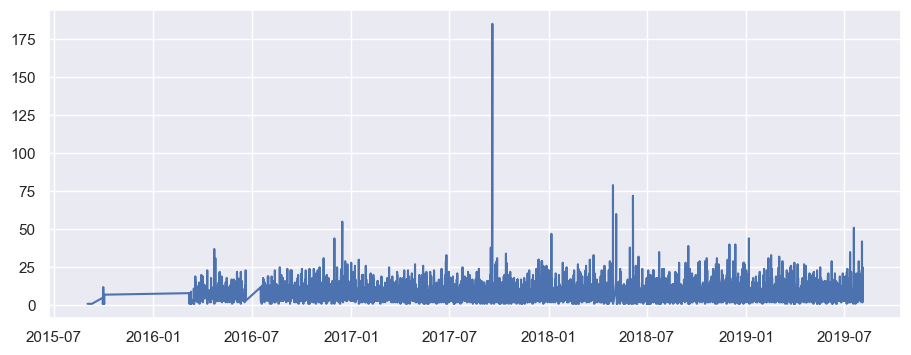

In [33]:
plt.plot(df_grouped['Order Date'], df_grouped['Total products'])

In [34]:
#dropping rows with more than 50 total products
df_grouped.drop(df_grouped.loc[df_grouped['Total products'] > 50].index, inplace=True)

In [35]:
df_grouped.shape

(13073, 6)

<Axes: xlabel='Total products', ylabel='Revenue'>

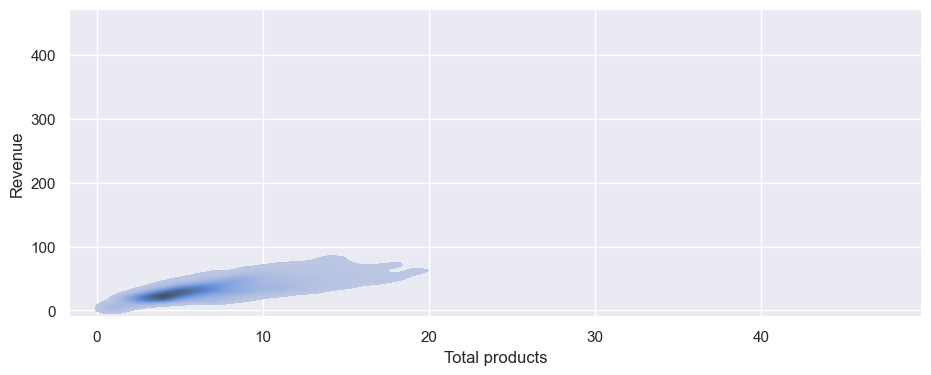

In [36]:

sns.kdeplot(df_grouped, x = 'Total products', y = 'Revenue', fill=True, n_levels=100)

In [37]:

# Custom function to join strings in the "Item Name" column
def join_items(series):
    return ", ".join(series.dropna().astype(str))


# Resampling by week and applying the custom function to "Item Name"
dfgweek = df_grouped.resample('W', on='Order Date').agg({
    'Item Name': join_items,  # Custom aggregation for strings
    'Quantity': 'sum',       # Sum for numerical columns
    'Total products': 'sum', # Example for summing another column
    'PriceArray': 'sum',
    'Revenue': 'sum'         # Sum for revenue
}).reset_index()

# dfgday = df_grouped.resample('D', on='Order Date').sum().reset_index()
# dfgweek = df_grouped.resample('W', on='Order Date').sum().reset_index()
# dfgmonth = df_grouped.resample('ME', on='Order Date').sum().reset_index()
# dfgquarter = df_grouped.resample('QE', on='Order Date').sum().reset_index()
# dfgyear = df_grouped.resample('YE', on='Order Date').sum().reset_index()


In [38]:
dfgweek

Order Date                                          Item Name  \
0   2015-09-06                                        Onion Bhaji   
1   2015-09-13  Onion Bhaji, Onion Bhaji, Onion Bhaji, Onion B...   
2   2015-09-20                                                      
3   2015-09-27                                                      
4   2015-10-04  Chicken Tikka, Tandoori Chicken (1/4), Chicken...   
..         ...                                                ...   
200 2019-07-07  Chicken Tikka Masala, Pilau Rice, Saag Aloo, P...   
201 2019-07-14  Curry - Lamb, Korma - Chicken, Plain Rice, Chi...   
202 2019-07-21  Vindaloo - Lamb, Saag Bhajee, Tandoori Mixed G...   
203 2019-07-28  Persian Lamb Biryani, Plain Papadum, Curry Sau...   
204 2019-08-04  Korma - Chicken, Mint Sauce, Plain Rice, Chick...   

                                              Quantity  Total products  \
0                                                  [1]               1   
1                          [1, 1, 1, 1, 1, 1, 1, 1, 1]               9   
2                                                    0               0   
3                                                    0               0   
4    [1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, ...              70   
..                                                 ...             ...   
200  [2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 3, 3, 2, ...             792   
201  [1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...             598   
202  [1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, ...             774   
203  [1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, ...             785   
204  [1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...             603   

                                            PriceArray  Revenue  
0                                               [3.95]     3.95  
1    [3.95, 3.95, 3.95, 3.95, 3.95, 3.95, 3.95, 3.9...    35.55  
2                                                    0     0.00  
3                                                    0     0.00  
4    [7.95, 4.95, 7.95, 4.95, 5.95, 4.95, 5.95, 4.9...   385.00  
..                                                 ...      ...  
200  [8.95, 2.95, 5.95, 2.95, 3.95, 9.95, 3.95, 2.9...  3652.10  
201  [7.95, 8.95, 2.95, 8.95, 8.95, 3.95, 2.95, 8.9...  2796.15  
202  [7.95, 5.95, 11.95, 9.95, 5.95, 0.5, 0.5, 0.5,...  3631.25  
203  [10.95, 0.8, 3.95, 4.95, 2.95, 2.95, 9.95, 4.9...  3653.10  
204  [8.95, 0.5, 2.95, 4.95, 3.95, 5.95, 2.95, 2.6,...  2823.80  

[205 rows x 6 columns]

In [39]:
dfgweek = dfgweek.drop(dfgweek.loc[0:4,].index)

In [40]:
dfgweek.loc[69,'Order Date']

Timestamp('2017-01-01 00:00:00')

In [41]:
dfgweek = dfgweek.drop(dfgweek[dfgweek['Item Name'] == ""].index)

In [42]:
dfgweek.reset_index(inplace=True, drop=True)

<Axes: xlabel='Order Date', ylabel='Total products'>

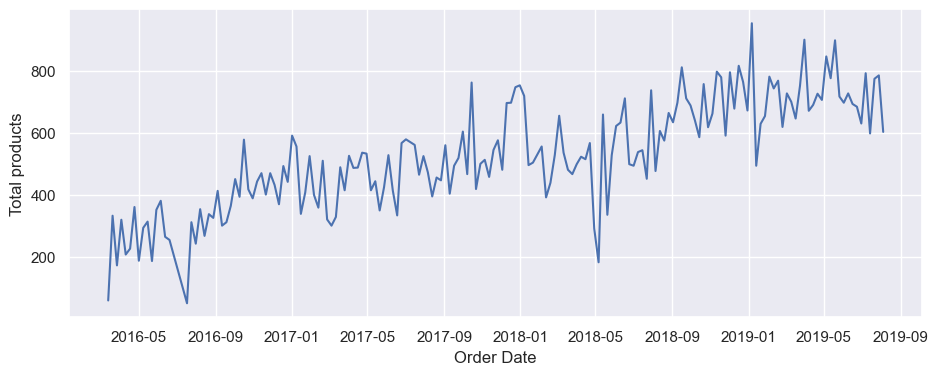

In [43]:
sns.lineplot(data=dfgweek, x='Order Date', y='Total products')

In [44]:
dfgweek['Item Name'] = dfgweek['Item Name'].apply(lambda x: x.split(', '))
dfgweek

Order Date                                          Item Name  \
0   2016-03-13  [Green Salad, French Fries, Chicken Tikka (Mai...   
1   2016-03-20  [Onion Bhajee, Meat Samosa, Puree, Meat Samosa...   
2   2016-03-27  [Chicken Tikka Balti, Pilau Rice, Chicken Tikk...   
3   2016-04-03  [Madras, Bombay Aloo, Chicken Tikka Masala, Pl...   
4   2016-04-10  [Madras, Chicken Tikka Masala, Pilau Rice, Bom...   
..         ...                                                ...   
170 2019-07-07  [Chicken Tikka Masala, Pilau Rice, Saag Aloo, ...   
171 2019-07-14  [Curry - Lamb, Korma - Chicken, Plain Rice, Ch...   
172 2019-07-21  [Vindaloo - Lamb, Saag Bhajee, Tandoori Mixed ...   
173 2019-07-28  [Persian Lamb Biryani, Plain Papadum, Curry Sa...   
174 2019-08-04  [Korma - Chicken, Mint Sauce, Plain Rice, Chic...   

                                              Quantity  Total products  \
0    [1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, ...              60   
1    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...             333   
2    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...             173   
3    [1, 1, 2, 3, 2, 4, 1, 3, 1, 1, 1, 1, 1, 1, 1, ...             320   
4    [1, 1, 3, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, ...             208   
..                                                 ...             ...   
170  [2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 3, 3, 2, ...             792   
171  [1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...             598   
172  [1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, ...             774   
173  [1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, ...             785   
174  [1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...             603   

                                            PriceArray  Revenue  
0    [2.95, 3.95, 8.95, 8.95, 3.95, 9.95, 3.95, 4.9...   279.55  
1    [3.95, 3.95, 1.95, 3.95, 8.95, 8.95, 3.95, 9.9...  1734.55  
2    [10.95, 2.95, 8.95, 2.6, 5.95, 8.95, 3.95, 2.6...   918.05  
3    [7.95, 5.95, 8.95, 2.6, 2.95, 0.8, 7.95, 0.8, ...  1507.75  
4    [7.95, 8.95, 2.95, 5.95, 2.6, 11.95, 2.95, 3.9...  1056.40  
..                                                 ...      ...  
170  [8.95, 2.95, 5.95, 2.95, 3.95, 9.95, 3.95, 2.9...  3652.10  
171  [7.95, 8.95, 2.95, 8.95, 8.95, 3.95, 2.95, 8.9...  2796.15  
172  [7.95, 5.95, 11.95, 9.95, 5.95, 0.5, 0.5, 0.5,...  3631.25  
173  [10.95, 0.8, 3.95, 4.95, 2.95, 2.95, 9.95, 4.9...  3653.10  
174  [8.95, 0.5, 2.95, 4.95, 3.95, 5.95, 2.95, 2.6,...  2823.80  

[175 rows x 6 columns]

In [45]:
dfgweek['Item Name'][3]

['Madras',
 'Bombay Aloo',
 'Chicken Tikka Masala',
 'Plain Naan',
 'Pilau Rice',
 'Plain Papadum',
 'Madras',
 'Plain Papadum',
 'Lamb Tikka Jalfrezi',
 'Onion Chutney',
 'Mint Sauce',
 'Saag Rice',
 'Keema Naan',
 'Onion Rice',
 'Butter Chicken',
 'Plain Naan',
 'Lamb Karahi',
 'Bombay Aloo',
 'Chapati',
 'Madras',
 'Lemon Rice',
 'Meat Samosa',
 'Saag Paneer',
 'Chicken Tikka Chilli Masala',
 'Plain Naan',
 'Sheek Kebab (Main)',
 'Special Fried Rice',
 'Chicken Karahi',
 'Saag Aloo',
 'Plain Naan',
 'King Prawn Karahi',
 'Chicken Biryani',
 'Plain Papadum',
 'Korma',
 'Plain Rice',
 'Onion Chutney',
 'Chicken Tikka Masala',
 'Plain Naan',
 'Chicken Tikka Garlic',
 'Plain Papadum',
 'Mushroom Rice',
 'Onion Bhajee',
 'Onion Chutney',
 'Chicken Tikka Chilli Masala',
 'COBRA (660ML)',
 'Pilau Rice',
 'Garlic Naan',
 'Mixed Starter',
 'Tarka Dall',
 'Lamb Rezala',
 'Vegetable Rice',
 'Chicken Balti',
 'Coke 1.5 ltr',
 'Peshwari Naan',
 'Plain Rice',
 'Keema Naan',
 'Bombay Aloo',
 'Pila

In [46]:
from transformer import Transformer
import torch

In [47]:
START_TOKEN = ' '
END_TOKEN = '.'
PADDING_TOKEN = '|'

numbers = ['1','2','3','4','5','6','7','8','9','0','-']
index_to_time = {}

for i, n in enumerate(numbers):
    index_to_time[i] = n


print(index_to_time)

index_to_obj = dfd.loc[:, "Item Name"].to_dict()

lt = len(index_to_time.keys())
lo = len(index_to_obj.keys())

index_to_obj[lo] = START_TOKEN
index_to_obj[lo + 1] = END_TOKEN
index_to_obj[lo + 2] = PADDING_TOKEN
index_to_obj[lo + 3] = '0'

index_to_time[lt] = START_TOKEN
index_to_time[lt + 1] = END_TOKEN
index_to_time[lt + 2] = PADDING_TOKEN




{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: '0', 10: '-'}


In [48]:
index_to_obj.values()

dict_values(['Onion Bhaji', 'Chicken Tikka', 'Tandoori Chicken (1/4)', 'Vegetable Samosa', 'Tandoori Fish', 'Royal Paneer', 'Prawn Puree', 'Chicken Sylhet', 'Vegetable Balti', 'Vegetable Karahi', 'Sheek Kehab', 'Onion Chutney', 'Mint Sauce', 'Lime Pickle', 'Paratha', 'Kurma', 'COBRA (330ML)', 'Lamb Persian', 'Spicy Papadum', 'Tandoori Chicken', 'Cauliflower Bhajee', 'Chicken Pakora', 'Lemon Rice', 'COBRA (660ML)', 'Coke 1.5 ltr', 'House Red wine 75cl', 'Green Salad', 'French Fries', 'Chicken Tikka (Main)', 'Sheek Kebab (Main)', 'Bengal Salad', 'Chicken Haryali', 'Onion Bhajee', 'Aloo Chaat', 'Meat Samosa', 'Vegetable Roll', 'Lamb Tikka (Main)', 'Onion Naan', 'Chapati', 'Stuffed Paratha', 'Puree', 'Chicken Tikka Masala', 'Chicken Tikka Karahi', 'Madras', 'Plain Rice', 'Pilau Rice', 'Lamb Shashlick', 'Chicken Chaat', 'Saag Rice', 'Plain Naan', 'Plain Papadum', 'Keema Naan', 'Curry', 'Bombay Aloo', 'Tandoori Mixed Grill', 'Hazary Lamb', 'Egg Rice', 'Garlic Naan', 'Garlic Rice', 'Dupiaza',

In [49]:
time_to_index = {v: k for k, v in index_to_time.items()}
obj_to_index = {v: k for k, v in index_to_obj.items()}

In [50]:
print(time_to_index)

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '0': 9, '-': 10, ' ': 11, '.': 12, '|': 13}


In [51]:
time_train = list(dfgweek.loc[:,'Order Date'].astype(str))

In [52]:
time_train[0]

'2016-03-13'

In [53]:
index_to_time

{0: '1',
 1: '2',
 2: '3',
 3: '4',
 4: '5',
 5: '6',
 6: '7',
 7: '8',
 8: '9',
 9: '0',
 10: '-',
 11: ' ',
 12: '.',
 13: '|'}

In [54]:
len(time_to_index)

14

In [55]:
# obj_train = []

# for row in dfgweek.iterrows():
#     temp = row['Item Name'].split(",").join("")
#     obj_train.append(temp)
    

In [56]:
dfgweek.loc[:, "Item Name"]

0      [Green Salad, French Fries, Chicken Tikka (Mai...
1      [Onion Bhajee, Meat Samosa, Puree, Meat Samosa...
2      [Chicken Tikka Balti, Pilau Rice, Chicken Tikk...
3      [Madras, Bombay Aloo, Chicken Tikka Masala, Pl...
4      [Madras, Chicken Tikka Masala, Pilau Rice, Bom...
                             ...                        
170    [Chicken Tikka Masala, Pilau Rice, Saag Aloo, ...
171    [Curry - Lamb, Korma - Chicken, Plain Rice, Ch...
172    [Vindaloo - Lamb, Saag Bhajee, Tandoori Mixed ...
173    [Persian Lamb Biryani, Plain Papadum, Curry Sa...
174    [Korma - Chicken, Mint Sauce, Plain Rice, Chic...
Name: Item Name, Length: 175, dtype: object

In [57]:
obj_train = list(dfgweek.loc[:, "Item Name"])


In [58]:
for i in range(len(obj_train)):
    if type(obj_train[i]) is int:
        print(obj_train[i])

In [59]:
obj_train

[['Green Salad',
  'French Fries',
  'Chicken Tikka (Main)',
  'Sheek Kebab (Main)',
  'Bengal Salad',
  'Chicken Haryali',
  'Onion Bhajee',
  'Aloo Chaat',
  'Onion Bhajee',
  'Meat Samosa',
  'Chicken Tikka',
  'Vegetable Roll',
  'Onion Bhajee',
  'Vegetable Roll',
  'Aloo Chaat',
  'Meat Samosa',
  'Lamb Tikka (Main)',
  'Green Salad',
  'Bengal Salad',
  'Chicken Tikka (Main)',
  'Sheek Kebab (Main)',
  'Onion Bhajee',
  'Chicken Haryali',
  'French Fries',
  'Onion Bhajee',
  'Onion Bhajee',
  'Meat Samosa',
  'Onion Bhajee',
  'Meat Samosa',
  'Aloo Chaat',
  'Meat Samosa',
  'Onion Bhajee',
  'Meat Samosa',
  'Onion Bhajee',
  'Aloo Chaat',
  'Bengal Salad',
  'COBRA (660ML)',
  'Onion Naan',
  'Chapati',
  'Green Salad',
  'Vegetable Karahi',
  'Stuffed Paratha',
  'Puree',
  'French Fries',
  'Onion Chutney',
  'Bengal Salad',
  'French Fries',
  'Onion Bhajee',
  'Onion Bhajee',
  'Meat Samosa'],
 ['Onion Bhajee',
  'Meat Samosa',
  'Puree',
  'Meat Samosa',
  'Chicken Tikk

In [60]:
obj_to_index

{'Onion Bhaji': 0,
 'Chicken Tikka': 1,
 'Tandoori Chicken (1/4)': 2,
 'Vegetable Samosa': 3,
 'Tandoori Fish': 4,
 'Royal Paneer': 5,
 'Prawn Puree': 6,
 'Chicken Sylhet': 7,
 'Vegetable Balti': 8,
 'Vegetable Karahi': 9,
 'Sheek Kehab': 10,
 'Onion Chutney': 11,
 'Mint Sauce': 12,
 'Lime Pickle': 13,
 'Paratha': 14,
 'Kurma': 15,
 'COBRA (330ML)': 16,
 'Lamb Persian': 17,
 'Spicy Papadum': 18,
 'Tandoori Chicken': 19,
 'Cauliflower Bhajee': 20,
 'Chicken Pakora': 21,
 'Lemon Rice': 22,
 'COBRA (660ML)': 23,
 'Coke 1.5 ltr': 24,
 'House Red wine 75cl': 25,
 'Green Salad': 26,
 'French Fries': 27,
 'Chicken Tikka (Main)': 28,
 'Sheek Kebab (Main)': 29,
 'Bengal Salad': 30,
 'Chicken Haryali': 31,
 'Onion Bhajee': 32,
 'Aloo Chaat': 33,
 'Meat Samosa': 34,
 'Vegetable Roll': 35,
 'Lamb Tikka (Main)': 36,
 'Onion Naan': 37,
 'Chapati': 38,
 'Stuffed Paratha': 39,
 'Puree': 40,
 'Chicken Tikka Masala': 41,
 'Chicken Tikka Karahi': 42,
 'Madras': 43,
 'Plain Rice': 44,
 'Pilau Rice': 45,
 

In [61]:
from torch.utils.data import Dataset, DataLoader

class ItemDataset(Dataset):
    def __init__(self, time_train, obj_train):
        self.time_train = time_train
        self.obj_train = obj_train

    def __len__(self):
        return len(self.time_train)
    
    def __getitem__(self, idx):
        return self.time_train[idx], self.obj_train[idx]

In [62]:
dataset = ItemDataset(time_train, obj_train)

In [63]:
len(dataset)

175

In [64]:
dataset[0]

('2016-03-13',
 ['Green Salad',
  'French Fries',
  'Chicken Tikka (Main)',
  'Sheek Kebab (Main)',
  'Bengal Salad',
  'Chicken Haryali',
  'Onion Bhajee',
  'Aloo Chaat',
  'Onion Bhajee',
  'Meat Samosa',
  'Chicken Tikka',
  'Vegetable Roll',
  'Onion Bhajee',
  'Vegetable Roll',
  'Aloo Chaat',
  'Meat Samosa',
  'Lamb Tikka (Main)',
  'Green Salad',
  'Bengal Salad',
  'Chicken Tikka (Main)',
  'Sheek Kebab (Main)',
  'Onion Bhajee',
  'Chicken Haryali',
  'French Fries',
  'Onion Bhajee',
  'Onion Bhajee',
  'Meat Samosa',
  'Onion Bhajee',
  'Meat Samosa',
  'Aloo Chaat',
  'Meat Samosa',
  'Onion Bhajee',
  'Meat Samosa',
  'Onion Bhajee',
  'Aloo Chaat',
  'Bengal Salad',
  'COBRA (660ML)',
  'Onion Naan',
  'Chapati',
  'Green Salad',
  'Vegetable Karahi',
  'Stuffed Paratha',
  'Puree',
  'French Fries',
  'Onion Chutney',
  'Bengal Salad',
  'French Fries',
  'Onion Bhajee',
  'Onion Bhajee',
  'Meat Samosa'])

In [77]:
# Collate Function (Crucial for handling variable-length lists)
def collate_fn(batch):
    time_batch = [item[0] for item in batch]
    obj_batch = [item[1] for item in batch]

    # Pad the list of strings to the maximum length in the batch
    max_len = max(len(lst) for lst in obj_batch)
    padded_obj = []

    for lst in obj_batch:
        padding = [PADDING_TOKEN] * (max_len - len(lst))  # Pad with empty strings
        padded_obj.append(lst + padding)

    return time_batch, padded_obj

In [78]:
batch_size = 32
train_loader = DataLoader(dataset, batch_size, shuffle=False, collate_fn=collate_fn)
iterator = iter(train_loader)

In [79]:
for batch_num, batch in enumerate(iterator):
    print(batch)


(['2016-03-13', '2016-03-20', '2016-03-27', '2016-04-03', '2016-04-10', '2016-04-17', '2016-04-24', '2016-05-01', '2016-05-08', '2016-05-15', '2016-05-22', '2016-05-29', '2016-06-05', '2016-06-12', '2016-06-19', '2016-07-17', '2016-07-24', '2016-07-31', '2016-08-07', '2016-08-14', '2016-08-21', '2016-08-28', '2016-09-04', '2016-09-11', '2016-09-18', '2016-09-25', '2016-10-02', '2016-10-09', '2016-10-16', '2016-10-23', '2016-10-30', '2016-11-06'], [['Green Salad', 'French Fries', 'Chicken Tikka (Main)', 'Sheek Kebab (Main)', 'Bengal Salad', 'Chicken Haryali', 'Onion Bhajee', 'Aloo Chaat', 'Onion Bhajee', 'Meat Samosa', 'Chicken Tikka', 'Vegetable Roll', 'Onion Bhajee', 'Vegetable Roll', 'Aloo Chaat', 'Meat Samosa', 'Lamb Tikka (Main)', 'Green Salad', 'Bengal Salad', 'Chicken Tikka (Main)', 'Sheek Kebab (Main)', 'Onion Bhajee', 'Chicken Haryali', 'French Fries', 'Onion Bhajee', 'Onion Bhajee', 'Meat Samosa', 'Onion Bhajee', 'Meat Samosa', 'Aloo Chaat', 'Meat Samosa', 'Onion Bhajee', 'Mea

In [80]:
obj_to_index

{'Onion Bhaji': 0,
 'Chicken Tikka': 1,
 'Tandoori Chicken (1/4)': 2,
 'Vegetable Samosa': 3,
 'Tandoori Fish': 4,
 'Royal Paneer': 5,
 'Prawn Puree': 6,
 'Chicken Sylhet': 7,
 'Vegetable Balti': 8,
 'Vegetable Karahi': 9,
 'Sheek Kehab': 10,
 'Onion Chutney': 11,
 'Mint Sauce': 12,
 'Lime Pickle': 13,
 'Paratha': 14,
 'Kurma': 15,
 'COBRA (330ML)': 16,
 'Lamb Persian': 17,
 'Spicy Papadum': 18,
 'Tandoori Chicken': 19,
 'Cauliflower Bhajee': 20,
 'Chicken Pakora': 21,
 'Lemon Rice': 22,
 'COBRA (660ML)': 23,
 'Coke 1.5 ltr': 24,
 'House Red wine 75cl': 25,
 'Green Salad': 26,
 'French Fries': 27,
 'Chicken Tikka (Main)': 28,
 'Sheek Kebab (Main)': 29,
 'Bengal Salad': 30,
 'Chicken Haryali': 31,
 'Onion Bhajee': 32,
 'Aloo Chaat': 33,
 'Meat Samosa': 34,
 'Vegetable Roll': 35,
 'Lamb Tikka (Main)': 36,
 'Onion Naan': 37,
 'Chapati': 38,
 'Stuffed Paratha': 39,
 'Puree': 40,
 'Chicken Tikka Masala': 41,
 'Chicken Tikka Karahi': 42,
 'Madras': 43,
 'Plain Rice': 44,
 'Pilau Rice': 45,
 

In [81]:
len(index_to_time)

14

In [82]:
len(time_to_index)

14

In [83]:
len(obj_to_index)

252

In [84]:
d_model = 64
ffn_hidden = 256
num_heads = 8
drop_prob = 0.1
num_layers = 12
max_sequence_length = 740
obj_size = len(obj_to_index)

transformer = Transformer(d_model,
                          ffn_hidden,
                          num_heads,
                          drop_prob,
                          num_layers,
                          max_sequence_length,
                          obj_size,
                          time_to_index,
                          obj_to_index,
                          START_TOKEN,
                          END_TOKEN,
                          PADDING_TOKEN)

In [85]:
transformer

Transformer(
  (encoder): Encoder(
    (sentence_embedding): SentenceEmbedding(
      (embedding): Embedding(14, 64)
      (position_encoder): PositionalEncoding()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): SequentialEncoder(
      (0): EncoderLayer(
        (attention): MultiHeadAttention(
          (qkv_layer): Linear(in_features=64, out_features=192, bias=True)
          (linear_layer): Linear(in_features=64, out_features=64, bias=True)
        )
        (norm1): LayerNormalization()
        (dropout1): Dropout(p=0.1, inplace=False)
        (ffn): PositionwiseFeedForward(
          (linear1): Linear(in_features=64, out_features=256, bias=True)
          (linear2): Linear(in_features=256, out_features=64, bias=True)
          (relu): ReLU()
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (norm2): LayerNormalization()
        (dropout2): Dropout(p=0.1, inplace=False)
      )
      (1): EncoderLayer(
        (attention): MultiHeadAttention(


In [86]:
from torch import nn

criterion = nn.CrossEntropyLoss(ignore_index=obj_to_index[PADDING_TOKEN], reduction='none')

for params in transformer.parameters():
    if params.dim() > 1:
        nn.init.xavier_uniform_(params)

optim = torch.optim.Adam(transformer.parameters(), lr=1e-4)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')


In [87]:
NEG_INFTY = -1e9

def create_masks(time_batch, item_batch):
    num_sentences = len(time_batch)
    # max_sequence_length = max(len(items) for items in item_batch) + 1
    
    look_ahead_mask = torch.full([max_sequence_length, max_sequence_length], True, device=device) # device should be same
    look_ahead_mask = torch.triu(look_ahead_mask, diagonal=1)

    encoder_padding_mask = torch.zeros([num_sentences, max_sequence_length, max_sequence_length], dtype=torch.bool, device=device) # device and dtype should be same
    decoder_padding_mask_self_attention = torch.zeros([num_sentences, max_sequence_length, max_sequence_length], dtype=torch.bool, device=device)
    decoder_padding_mask_cross_attention = torch.zeros([num_sentences, max_sequence_length, max_sequence_length], dtype=torch.bool, device=device)

    for idx in range(num_sentences):
        time_len = len(time_batch[idx])
        item_len = len(item_batch[idx])
        print(f"{max_sequence_length} {item_len} {time_len}")
        time_to_padding_mask = torch.arange(time_len + 1, max_sequence_length, device=device) # device should be same
        item_to_padding_mask = torch.arange(item_len + 1, max_sequence_length, device=device)

        encoder_padding_mask[idx, :, time_to_padding_mask] = True
        encoder_padding_mask[idx, time_to_padding_mask, :] = True

        decoder_padding_mask_self_attention[idx, :, item_to_padding_mask] = True
        decoder_padding_mask_self_attention[idx, item_to_padding_mask, :] = True

        decoder_padding_mask_cross_attention[idx, :, time_to_padding_mask] = True
        decoder_padding_mask_cross_attention[idx, time_to_padding_mask, :] = True

    encoder_self_attention_mask = torch.where(encoder_padding_mask, NEG_INFTY, 0.0)
    decoder_self_attention_mask = torch.where(look_ahead_mask + decoder_padding_mask_self_attention, NEG_INFTY, 0.0)
    decoder_cross_attention_mask = torch.where(decoder_padding_mask_cross_attention, NEG_INFTY, 0.0)

    return encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask

In [88]:
transformer.train()
transformer.to(device)
total_loss = 0
num_epochs = 10

for epoch in range(num_epochs):
    print(f"Epoch {epoch}")
    iterator = iter(train_loader)
    for batch_num, batch in enumerate(iterator):
        transformer.train()
        time_batch, item_batch = batch
        encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask = create_masks(time_batch, item_batch)
        optim.zero_grad()
        item_predictions = transformer(time_batch,
                                       item_batch,
                                       encoder_self_attention_mask.to(device),
                                       decoder_self_attention_mask.to(device),
                                       decoder_cross_attention_mask.to(device),
                                       enc_start_token = False,
                                       enc_end_token=False,
                                       dec_start_token=True,
                                       dec_end_token=True)
        labels = transformer.decoder.sentence_embedding.batch_tokenize(item_batch, start_token=False, end_token=True)
        loss = criterion(item_predictions.view(-1, obj_size).to(device),
                         labels.view(-1).to(device)).to(device)
        valid_indicies = torch.where(labels.view(-1) == obj_to_index[PADDING_TOKEN], False, True)
        loss = loss.sum() / valid_indicies.sum()
        loss.backward()
        optim.step()

        if True:
            print(f"Iteration {batch_num} : {loss.item()}")
            print(f"Week: {time_batch[0]}")
            print(f"Items: {item_batch[0]}")
            item_sentence_predicted = torch.argmax(item_predictions[0], axis=1)
            predicted_sentence = ""
            for idx in item_sentence_predicted:
                if idx == obj_to_index[END_TOKEN]:
                    break
                predicted_sentence += index_to_obj[idx.item()]
                predicted_sentence += ", "
                
            print(f"Item Prediction: {predicted_sentence}")


# Save the model
torch.save(transformer.state_dict(), 'trained_transformer_model.pth')  # Save the model's state dictionary


Epoch 0
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
740 481 10
tokenise within batch
tokenise within batch
tokenise within batch
tokenise within batch
tokenise within batch
tokenise within batch
tokenise within batch
tokenise within batch
tokenise within batch
tokenise within batch
tokenise within batch
tokenise within batch
tokenise within batch
tokenise within batch
tokenise within batch
tokenise within batch
tokenise within batch
tokenise within batch
tokenise within batch
tokenise within batch
tokenise within batch
tokenise within batch
tokenise within batch
tokenise within batch
tokenise within batch
tokenise within batch
tokenise within batch
tokenise within batch
tokenise within batch
to

In [132]:
transformer.eval()
item_sentence = [[START_TOKEN]]
time_sentence = ('2019-07-07',)
for word_counter in range(10):
    encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask = create_masks(time_sentence, item_sentence)
    predictions = transformer(time_sentence,
                                item_sentence,
                                encoder_self_attention_mask.to(device),
                                decoder_self_attention_mask.to(device),
                                decoder_cross_attention_mask.to(device),
                                enc_start_token=False,
                                enc_end_token=False,
                                dec_start_token=True,
                                dec_end_token=False)
    next_token_prob_distribution = predictions[0][word_counter]
    next_token_index = torch.argmax(next_token_prob_distribution).item()
    next_token = index_to_obj[next_token_index]
    print(item_sentence)
    print(item_sentence[0])
    item_sentence[0].append(next_token)
    print(item_sentence)
    if next_token == END_TOKEN:
        break

print(f"Testing (2019-07-07): {item_sentence}")
print("--------------------------------------------------------------------------------")


740 1 10
tokenise within batch
batch tokenise ran
positional encoding forward
sentence embedding forward
scaled dot product ran
multiattention head forward
layer normalisation forward
Positionwise feed forward 
layer normalisation forward
encoder layer forward
scaled dot product ran
multiattention head forward
layer normalisation forward
Positionwise feed forward 
layer normalisation forward
encoder layer forward
scaled dot product ran
multiattention head forward
layer normalisation forward
Positionwise feed forward 
layer normalisation forward
encoder layer forward
scaled dot product ran
multiattention head forward
layer normalisation forward
Positionwise feed forward 
layer normalisation forward
encoder layer forward
scaled dot product ran
multiattention head forward
layer normalisation forward
Positionwise feed forward 
layer normalisation forward
encoder layer forward
scaled dot product ran
multiattention head forward
layer normalisation forward
Positionwise feed forward 
layer nor

In [133]:
item_sentence[0]

[' ',
 'Pilau Rice',
 'Pilau Rice',
 'Pilau Rice',
 'Pilau Rice',
 'Pilau Rice',
 'Pilau Rice',
 'Pilau Rice',
 'Pilau Rice',
 'Pilau Rice',
 'Pilau Rice']